# Goal: Predict whether a student gets admitted to university based on exam scores.

In [258]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [259]:
df = pd.read_csv("Data/student_admission_dataset.csv")
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [261]:
df.duplicated().sum()

np.int64(0)

In [262]:
df.isnull().sum()

GPA                           0
SAT_Score                     0
Extracurricular_Activities    0
Admission_Status              0
dtype: int64

In [263]:
df["Admission_Status"].unique()

array(['Rejected', 'Accepted', 'Waitlisted'], dtype=object)

In [264]:
df["Extracurricular_Activities"].unique()

array([ 8,  9,  5,  7,  6,  2,  4,  3, 10,  1,  0])

In [265]:
df["GPA"].unique()

array([3.46, 2.54, 2.91, 2.83, 3.6 , 3.52, 3.84, 2.63, 3.13, 3.26, 2.8 ,
       3.47, 3.32, 3.38, 3.71, 2.51, 3.55, 3.01, 2.73, 3.94, 3.  , 2.64,
       2.65, 3.77, 3.41, 3.59, 3.3 , 3.96, 3.07, 3.33, 3.74, 3.43, 3.79,
       3.37, 3.56, 2.57, 2.84, 2.93, 2.62, 2.85, 2.92, 3.45, 3.05, 3.06,
       2.81, 2.9 , 3.9 , 2.76, 2.75, 3.98, 3.34, 3.53, 3.76, 3.66, 2.55,
       2.97, 2.82, 3.91, 3.81, 3.48, 3.09, 3.87, 3.19, 2.87, 2.89, 3.85,
       3.1 , 4.  , 2.66, 3.44, 3.69, 2.6 , 3.99, 3.29, 2.52, 3.58, 3.31,
       2.67, 3.15, 3.18, 3.93, 3.25, 2.77, 2.95, 3.64, 3.67, 2.5 , 2.99,
       2.53, 3.89, 3.82, 3.75, 2.96, 2.59, 3.92, 3.23, 3.65, 2.69, 3.21,
       3.16, 3.28, 2.68, 2.61, 3.86, 2.86, 3.5 , 2.7 , 3.36, 3.68, 2.79,
       3.14, 3.2 , 3.51, 3.17, 3.88, 2.58, 3.95, 3.62, 3.78, 2.74, 2.78,
       3.39, 3.57])

In [266]:
df["SAT_Score"].unique()

array([1223,  974,  909, 1369, 1536, 1476, 1002,  975, 1450, 1118, 1418,
       1171, 1035, 1257,  970, 1150, 1278, 1191, 1061, 1348, 1456, 1209,
       1526, 1569, 1441,  908, 1583, 1467, 1206, 1579, 1006, 1037, 1170,
       1018, 1009, 1466, 1059, 1178, 1188, 1519, 1115, 1251, 1108, 1549,
       1417, 1400, 1157,  952,  994, 1333, 1183,  945,  903, 1241, 1033,
       1552, 1168, 1065, 1352, 1464, 1337, 1474, 1014,  977, 1052, 1458,
        936, 1496, 1465, 1051, 1340, 1030,  942, 1215, 1273,  940, 1266,
       1598, 1155, 1582, 1005, 1262, 1473, 1316, 1535, 1058, 1142, 1066,
       1081, 1322,  925, 1083, 1240, 1321, 1585, 1154, 1173, 1063, 1010,
       1291,  939, 1381, 1127, 1104, 1371, 1258, 1212, 1133, 1128,  924,
       1575, 1097, 1308, 1236, 1185,  971, 1259, 1556, 1421, 1309, 1595,
       1449, 1239,  928, 1167, 1082, 1494, 1011, 1510, 1344, 1253, 1221,
       1346, 1520, 1423, 1294, 1490, 1094, 1160,  901, 1432, 1451, 1586,
       1101, 1272, 1341, 1580, 1238, 1538, 1027, 12

## visualize the relationship between features and labels

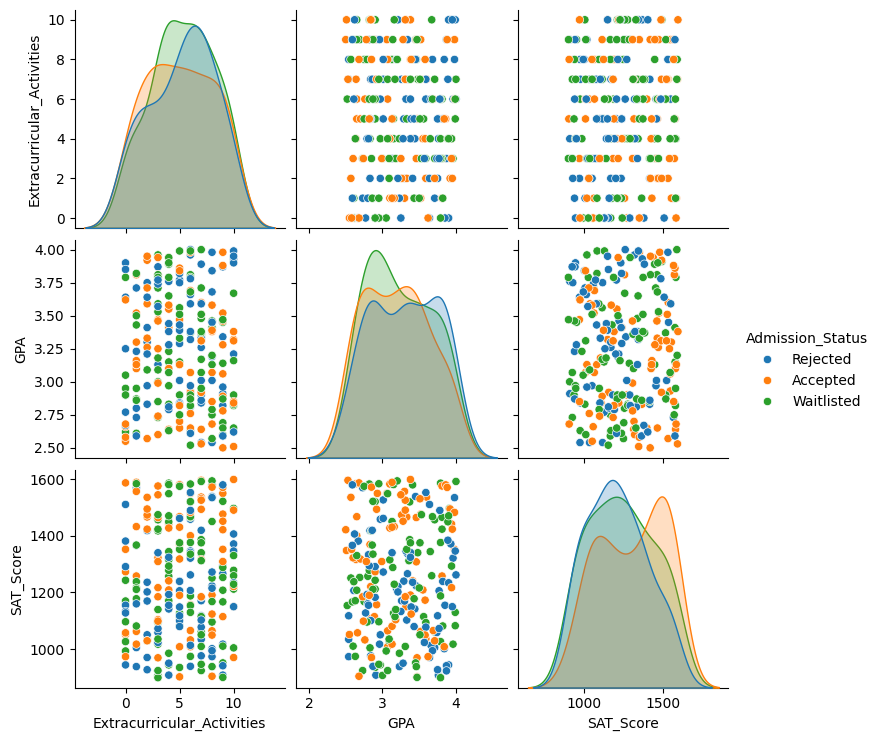

In [267]:
sns.pairplot(df, vars=["Extracurricular_Activities","GPA","SAT_Score"], hue="Admission_Status")  
plt.show()

In [268]:
X, y = df[["GPA", "SAT_Score", "Extracurricular_Activities"]], df["Admission_Status"]

## Encode the categorical column:

In [269]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

## Training:

In [271]:
lc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=100))
])


In [272]:
lc_model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [273]:
print("Accuracy:", lc_model.score(X_test, y_test))

Accuracy: 0.42
